## Importing packages and loading datasets

In [1]:
import sys
print(sys.version)

3.11.5 (v3.11.5:cce6ba91b3, Aug 24 2023, 10:50:31) [Clang 13.0.0 (clang-1300.0.29.30)]


In [2]:
import os
import pandas as pd
print(pd.__version__)

import numpy as np
print(np.__version__)

import random as rd
import pickle
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import sklearn
print(sklearn.__version__)

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import f_oneway, chi2_contingency, kruskal
from sklearn.preprocessing import OneHotEncoder
import random
from tqdm import tqdm
from sklearn.manifold import trustworthiness
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
import warnings
from statistics import mean

import umap
print(umap.__version__)


2.2.2
2.0.1
1.5.1
0.5.4


In [3]:
CD_data = pickle.load(open('Processed_Datasets/CD_prepared.pkl', 'rb'))

In [4]:
df_train = CD_data.drop(['Cluster\'s latitude coordinate', 'Cluster\'s longitude coordinate'], axis=1)
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   midx                           9307 non-null   object 
 1   country                        9307 non-null   object 
 2   ChildDied                      9307 non-null   object 
 3   AgeOfChildAtDeath              9307 non-null   float64
 4   ChildGender_Male               9307 non-null   object 
 5   PreceedingBirthInterval(33+)   9307 non-null   object 
 6   WasBreastfed                   9307 non-null   object 
 7   HealthFacilityDelivery         9307 non-null   object 
 8   SkilledDeliveryCareProvider    9307 non-null   object 
 9   AntenatalCare(4+)              9307 non-null   object 
 10  NeonatalTetanusProtection(2+)  9307 non-null   object 
 11  IronPillsDuringPregnancy       9307 non-null   object 
 12  BabyPostnatalCheck             9307 non-null   o

In [5]:
feature_list = ['PreceedingBirthInterval(33+)', 'WasBreastfed', 'HealthFacilityDelivery', 'SkilledDeliveryCareProvider', 
            'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)', 'IronPillsDuringPregnancy',
            'BabyPostnatalCheck', 'MaternalPostpartumHealthCheck', 'MetNeedFamilyPlanning',
            'CleanCookingFuel', 'ProtectedDrinkingWaterSource', 'ImprovedToiletFacility', 
            'NonTobaccoSmoker', 'DecisionMaking_Participation', 
            'OfAgeMarriage']

### Remove zero indicators rows
selected_features = df_train[feature_list]
zero_rows = selected_features.sum(axis=1) == 0
df_train = df_train[~zero_rows]
df_train = df_train.reset_index(drop=True)


In [6]:
print(df_train['country'].value_counts())
print((df_train['country'].value_counts(dropna=False, normalize=True) * 100).round(2))


country
NG    1359
TD     637
CD     581
SL     475
MW     412
BJ     395
UG     384
MD     345
GN     334
CM     297
AO     296
BU     285
ET     278
ML     277
CI     256
KE     253
MR     229
ZM     227
LB     216
GM     211
TG     197
MZ     183
BF     167
TZ     146
ZW     144
RW     144
LS     136
GA     133
SN     117
GH     105
ZA      88
Name: count, dtype: int64
country
NG    14.60
TD     6.84
CD     6.24
SL     5.10
MW     4.43
BJ     4.24
UG     4.13
MD     3.71
GN     3.59
CM     3.19
AO     3.18
BU     3.06
ET     2.99
ML     2.98
CI     2.75
KE     2.72
MR     2.46
ZM     2.44
LB     2.32
GM     2.27
TG     2.12
MZ     1.97
BF     1.79
TZ     1.57
ZW     1.55
RW     1.55
LS     1.46
GA     1.43
SN     1.26
GH     1.13
ZA     0.95
Name: proportion, dtype: float64


In [7]:
X_train = df_train[feature_list]
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PreceedingBirthInterval(33+)   9307 non-null   object
 1   WasBreastfed                   9307 non-null   object
 2   HealthFacilityDelivery         9307 non-null   object
 3   SkilledDeliveryCareProvider    9307 non-null   object
 4   AntenatalCare(4+)              9307 non-null   object
 5   NeonatalTetanusProtection(2+)  9307 non-null   object
 6   IronPillsDuringPregnancy       9307 non-null   object
 7   BabyPostnatalCheck             9307 non-null   object
 8   MaternalPostpartumHealthCheck  9307 non-null   object
 9   MetNeedFamilyPlanning          9307 non-null   object
 10  CleanCookingFuel               9307 non-null   object
 11  ProtectedDrinkingWaterSource   9307 non-null   object
 12  ImprovedToiletFacility         9307 non-null   object
 13  Non

In [8]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train), columns = encoder.get_feature_names_out(X_train.columns))
X_train_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PreceedingBirthInterval(33+)_1   9307 non-null   float64
 1   PreceedingBirthInterval(33+)_2   9307 non-null   float64
 2   WasBreastfed_1                   9307 non-null   float64
 3   HealthFacilityDelivery_1         9307 non-null   float64
 4   SkilledDeliveryCareProvider_1    9307 non-null   float64
 5   AntenatalCare(4+)_1              9307 non-null   float64
 6   NeonatalTetanusProtection(2+)_1  9307 non-null   float64
 7   IronPillsDuringPregnancy_1       9307 non-null   float64
 8   BabyPostnatalCheck_1             9307 non-null   float64
 9   MaternalPostpartumHealthCheck_1  9307 non-null   float64
 10  MetNeedFamilyPlanning_1          9307 non-null   float64
 11  MetNeedFamilyPlanning_2          9307 non-null   float64
 12  CleanCookingFuel_1  

### UMAP Dimension Reduction function

In [9]:
random.seed(42)

In [10]:

def umap_embed(df, n_components=2, n_neighbors=500):
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for dice distance metric")
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for jaccard distance metric")
    warnings.filterwarnings('ignore', message="gradient function is not yet implemented for hamming distance metric")
  
    fit = umap.UMAP(metric='jaccard', 
                         n_neighbors=n_neighbors,
                         min_dist=0.0,
                         n_components=n_components, 
                         n_jobs=1,
                         random_state=42).fit(df)
    fit_data = pd.DataFrame(data=fit.embedding_)
        
    return fit_data, fit


### UMAP hyperparameter tuning and selecting values of K

In [11]:
def hyperparameter_tuning(df, n_components_range, n_neighbors_range, n_clusters_range):
    trustworthiness_scores = {}
    overall_silhouette_scores = {}
    
    for n_components in tqdm(n_components_range, desc='Evaluating n_components'):
        for n_neighbors in tqdm(n_neighbors_range, desc='Evaluating n_neighbors', leave=False):

            ### obtain umap embedding
            fit_data, _ = umap_embed(df,
                                  n_components=n_components,
                                  n_neighbors=n_neighbors)

            ### Obtain trustworthiness score
            warnings.filterwarnings('ignore', message="gradient function is not yet implemented for jaccard distance metric")
            df_array = df.to_numpy()
            trustworthiness_score = trustworthiness(df_array,
                                                    fit_data, 
                                                    n_neighbors=n_neighbors,
                                                    metric="jaccard")
            trustworthiness_scores[n_components, n_neighbors] = trustworthiness_score

            ### Apply K-means and evaluate silhouette score for different values of k
            silhouette_scores = {}
            for k in tqdm(n_clusters_range, desc='Looping through values of k', leave=False):
                untrained_model = KMeans(n_clusters=k, n_init=10, init = 'k-means++', random_state=42)
                trained_model = untrained_model.fit(fit_data)
                cluster_labels = trained_model.labels_
                score = silhouette_score(fit_data, cluster_labels)
                silhouette_scores[k] = score

            overall_silhouette_scores[n_components, n_neighbors] = silhouette_scores

    return trustworthiness_scores, overall_silhouette_scores



In [12]:
n_components_range = range(2, 9)
n_neighbors_range = [250, 500, 1000, 1500]
n_clusters_range = range(2, 9)
trustworthiness_scores, overall_silhouette_scores = hyperparameter_tuning(X_train_encoded, 
                                                                          n_components_range, 
                                                                          n_neighbors_range, 
                                                                          n_clusters_range)


Evaluating n_neighbors:   0%|                                                                                                | 0/4 [00:00<?, ?it/s]/Users/clairenajjuuko/Documents/SSA_ChildMortality/raw_datasets/RMNCH_Project_Code/RMNCHenv/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Looping through values of k:   0%|                                                                                           | 0/7 [00:00<?, ?it/s]

Looping through values of k:  14%|███████████▊                                                                       | 1/7 [00:00<00:05,  1.19it/s]

Looping through values of k:  29%|███████████████████████▋                                                           | 2/7 [00:01<00:03,  1.36it/s]

Looping through values of k:  43%|███████████████████████████████████▌                                               | 3/7 [00:02<00:

In [13]:

merged_dict_hyper = {key: {'Trustworthiness Score': trustworthiness_scores[key], 'Silhouette Scores': overall_silhouette_scores[key]} for key in trustworthiness_scores}
merged_df_hyper = pd.DataFrame.from_dict(merged_dict_hyper, orient='index')
merged_df_hyper.reset_index(inplace=True)
merged_df_hyper.columns = ['n_components', 'n_neighbors', 'Trustworthiness Score', 'Silhouette Scores']
merged_df_hyper['Highest Silhouette Score'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: max(x.values()))
merged_df_hyper['Best k'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: max(x, key=x.get))
merged_df_hyper['Average Silhouette Score'] = merged_df_hyper['Silhouette Scores'].apply(lambda x: mean(x.values()))

merged_df_hyper.to_csv('hyperparameter_file.csv', index=False)


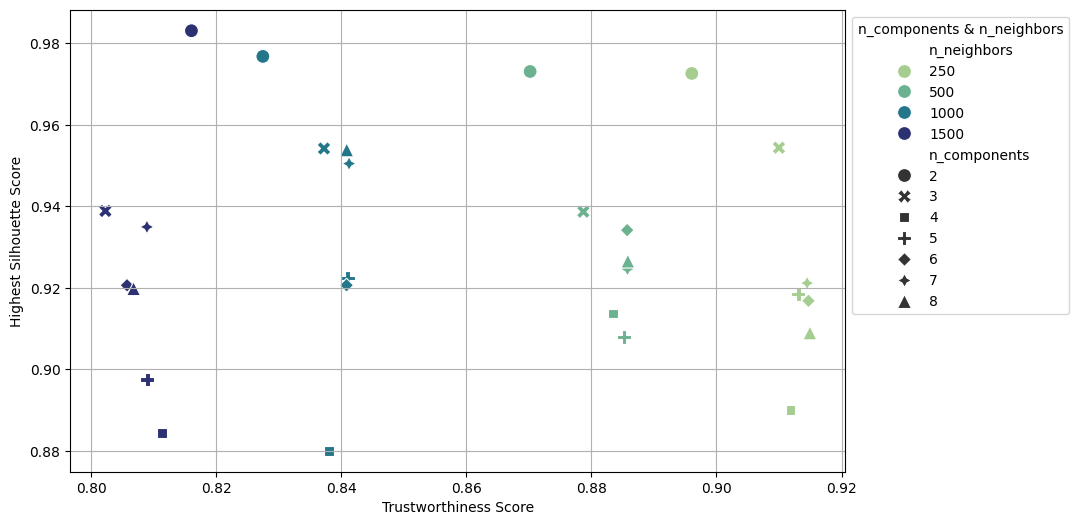

In [14]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df_hyper, x='Trustworthiness Score', y='Highest Silhouette Score', style='n_components', hue='n_neighbors', s=100, palette='crest')
plt.xlabel('Trustworthiness Score')
plt.ylabel('Highest Silhouette Score')
plt.grid(True)
plt.legend(title='n_components & n_neighbors', loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('Hyperparameter Plots/SilhouetteAndTrustworthiness.png', bbox_inches='tight', dpi=300)
plt.show()


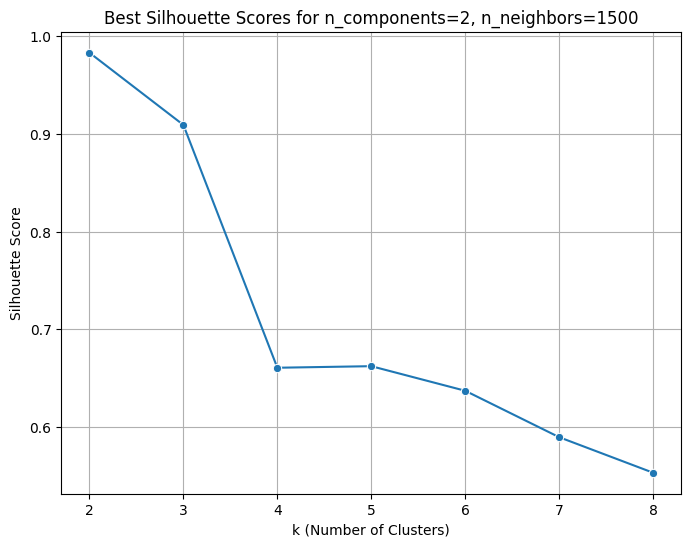

In [15]:

filtered_df = merged_df_hyper[merged_df_hyper['Trustworthiness Score'] >= 0.80]
best_row = filtered_df.loc[filtered_df['Highest Silhouette Score'].idxmax()]
best_silhouette_scores = best_row['Silhouette Scores']
plt.figure(figsize=(8, 6))
sns.lineplot(x=list(best_silhouette_scores.keys()), y=list(best_silhouette_scores.values()), marker='o')
plt.title(f'Best Silhouette Scores for n_components={best_row["n_components"]}, n_neighbors={best_row["n_neighbors"]}')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [16]:
best_silhouette_scores

{2: np.float32(0.98309195),
 3: np.float32(0.9091737),
 4: np.float32(0.66069597),
 5: np.float32(0.6623001),
 6: np.float32(0.6371357),
 7: np.float32(0.58963066),
 8: np.float32(0.553262)}

### Running the stability checks

In [17]:
from scipy.spatial.distance import cdist
from typing import List

def mapping_Euclidean(center_ori, center_map, label_ori):
    dist_mat = cdist(center_map, center_ori)
    mapping_pre = np.argmin(dist_mat, axis=1)
    mapping = [label_ori[i] for i in mapping_pre]
    return mapping

def jaccard(set1, set2):
    """Calculate the Jaccard similarity between two sets."""
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    jaccard = intersection/union
    return jaccard

def agreement(clst1: List[int], clst2: List[int]) -> List[float]:
    n1 = len(clst1)
    n1_occur = pd.DataFrame(pd.Series(clst1).value_counts().reset_index())
    n1_occur.columns = ['clst1', 'Freq']
    nk1 = n1_occur[n1_occur['Freq'] > 1]['clst1'].unique().tolist()

    n2 = len(clst2)
    n2_occur = pd.DataFrame(pd.Series(clst2).value_counts().reset_index())
    n2_occur.columns = ['clst2', 'Freq']
    nk2 = n2_occur[n2_occur['Freq'] > 1]['clst2'].unique().tolist()

    if n1 != n2:
        print('Warning: sample size is not equal')
    n = n1

    if not nk1 or not nk2:
        stab_vec = [0] * n
    else:
        cluster_sets_1 = {i: [j for j, x in enumerate(clst1) if x == i] for i in nk1}
        cluster_sets_2 = {i: [j for j, x in enumerate(clst2) if x == i] for i in nk2}

        jaccard_matrix = [[0] * len(set(nk2)) for _ in range(len(set(nk1)))]
        for i, x in enumerate(nk1):
            for j, y in enumerate(nk2):
                jaccard_matrix[i][j] = len(set(cluster_sets_1[x]) & set(cluster_sets_2[y])) / len(set(cluster_sets_1[x]) | set(cluster_sets_2[y]))

        """
        stab_vec = []
        for i in range(n):
            memb = n1_occur[n1_occur['clst1'] == clst1[i]].index[0]
            memb_star = n2_occur[n2_occur['clst2'] == clst2[i]].index[0]
            stab_vec.append(jaccard_matrix[memb][memb_star])
        """
        stab_vec = []
        for i in range(n):
            clst1_label = clst1[i]
            clst2_label = clst2[i]
            if clst1_label in nk1 and clst2_label in nk2:
                memb = nk1.index(clst1_label)
                memb_star = nk2.index(clst2_label)
                stab_vec.append(jaccard_matrix[memb][memb_star])
            else:
                stab_vec.append(0)

    return stab_vec


def min_agreement(clst, agrmt):
    clst = np.array(clst)
    agrmt = np.array(agrmt)
    clst_list = np.unique(clst)
    clst_sta = [np.mean(agrmt[clst == cl]) for cl in clst_list]
    min_agrmt = min(clst_sta)
    
    return min_agrmt
    

In [18]:
def scheme2(df, nk, B=20, r=10):
    results = {}
    n = df.shape[0]
    clst_mat = np.full((B+1, n), np.nan)
    silhouette_scores = []

    fit_data,_ = umap_embed(df, 
                            n_components=2, 
                            n_neighbors = 1500)
    
    km = KMeans(n_clusters=nk, random_state=42, n_init=r).fit(fit_data)
    centers = km.cluster_centers_
    clst = km.labels_
    clst_mat[0, :] = clst
    silhouette_scores.append(silhouette_score(fit_data, clst))
    
    #stab_matrix = np.full((n, B), np.nan)

    for b in range(B):
        np.random.seed(b)
        resample_indices = np.random.choice(range(n), size=n, replace=True)
        df_star1 = df.iloc[resample_indices]
        
        df_star, _ = umap_embed(df_star1, 
                             n_components=2, 
                             n_neighbors = 1500)
        
        #df_star = combined_embedding_data.iloc[resample_indices]

        km_star = KMeans(n_clusters=nk, random_state=b, n_init=r).fit(df_star)
        center_star = km_star.cluster_centers_

        class_star = mapping_Euclidean(center_star, fit_data, np.arange(nk))
        clst_mat[b+1, :] = class_star
        #silhouette_scores.append(silhouette_score(df_star, class_star))

    B1 = B+1
    agree_mat = np.full((B1, B1), np.nan)
    np.fill_diagonal(agree_mat, 1)

    for i in range(B1-1):
        for j in range(i+1, B1):
            agree_mat[i, j] = np.mean(agreement(clst_mat[i, :], clst_mat[j, :]))
            agree_mat[j, i] = agree_mat[i, j]

    # Obtain the reference cluster which is the cluster with the 
    mean_agr = np.mean(agree_mat, axis=1)
    ref = np.argmax(mean_agr)
    clst_ref = clst_mat[ref, :]

    stab_mat = np.full((B1, n), np.nan)
    for i in tqdm(range(B1)):
        stab_mat[i, :] = agreement(clst_ref, clst_mat[i, :])

    obs_wise = np.mean(stab_mat, axis=0)

    results['membership'] = clst_ref
    results['obs_wise'] = obs_wise
    results['cluster_matrix'] = clst_mat
    results['agree_matrix'] = agree_mat
    results['ref_cluster'] = ref
    results['silhouette_scores'] = silhouette_scores

    return results

In [19]:
def stability(df, k, B=20, r=10, scheme_2 = True):
    result = {}
    output = scheme2(df=df, nk=k, B=B, r=r)

    clst_mat = output['cluster_matrix']
    agree_mat = output['agree_matrix']

    ref=0
    if scheme_2:
        ref = output['ref_cluster']

    result['membership'] = clst_mat[ref, :]
    result['obs_wise'] = output['obs_wise']
    result['overall'] = np.mean(result['obs_wise'])
    result['silhouette_score'] = output['silhouette_scores']

    return result


def kSelect(df, k_range=range(2,8), B=20, r=10, threshold=0.9, scheme_2 = True):
    result = {}
    crit = []
    silhouette_scores_dict = {} 
    for k in k_range:
        min_agr = []
        s2 = scheme2(df=df, nk=k, B=B, r=r)
        c_mat = s2['cluster_matrix']
        silhouette_scores = s2['silhouette_scores'] 

        ref=0
        if(scheme2):
            ref = s2['ref_cluster']

        ref_cl = c_mat[ref, :]
        c_mat_1 = np.delete(c_mat, ref, axis=0)

        for i in range(B):
            min_agr.append(min_agreement(ref_cl, agreement(ref_cl, c_mat_1[i, :])))

        crit.append(np.mean(min_agr))
        silhouette_scores_dict[k] = np.mean(silhouette_scores)

    crit_dict = dict(zip(k_range, crit))


    valid_k_values = [k for k, v in crit_dict.items() if v > threshold]
    if valid_k_values:
        result['k'] = max(valid_k_values)  # Choose the maximum k that satisfies the threshold
    else:
        print(f"No k values exceeded the threshold of {threshold}. Returning empty results.")
        result['k'] = None 
    
    result['profile'] = crit_dict
    result['silhouette_scores'] = silhouette_scores_dict   
    return result
  

In [20]:
stability_results = stability(X_train_encoded, k=3, B=20, r=10, scheme_2=False)
stability_results

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 167.83it/s]


{'membership': array([2., 2., 2., ..., 0., 0., 2.]),
 'obs_wise': array([0.92303063, 0.92303063, 0.92303063, ..., 0.94507451, 0.97274715,
        0.92303063]),
 'overall': np.float64(0.9505725606389435),
 'silhouette_score': [np.float32(0.9091737)]}

In [21]:
# Getting unique elements and their counts
unique_values, counts = np.unique(stability_results['obs_wise'], return_counts=True)
value_counts = dict(zip(unique_values, counts))
print(value_counts)

{np.float64(0.445290180729078): np.int64(1), np.float64(0.8498918218061762): np.int64(1), np.float64(0.8974948482130255): np.int64(2), np.float64(0.9205385243979382): np.int64(1619), np.float64(0.9222801666391343): np.int64(36), np.float64(0.9230306303690806): np.int64(1707), np.float64(0.9450745125626583): np.int64(1242), np.float64(0.9727471509950143): np.int64(4699)}


In [22]:
k_select_results = kSelect(X_train_encoded, range(2,9), B=20, r=10, scheme_2=False)
k_select_results

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 140.21it/s]


{'k': 3,
 'profile': {2: np.float64(0.8719889273829923),
  3: np.float64(0.9012299574850731),
  4: np.float64(0.8802059257183268),
  5: np.float64(0.0),
  6: np.float64(0.16681691243537677),
  7: np.float64(0.1775176749717865),
  8: np.float64(0.0)},
 'silhouette_scores': {2: np.float32(0.98309195),
  3: np.float32(0.9091737),
  4: np.float32(0.66069597),
  5: np.float32(0.6623001),
  6: np.float32(0.6371357),
  7: np.float32(0.58963066),
  8: np.float32(0.553262)}}

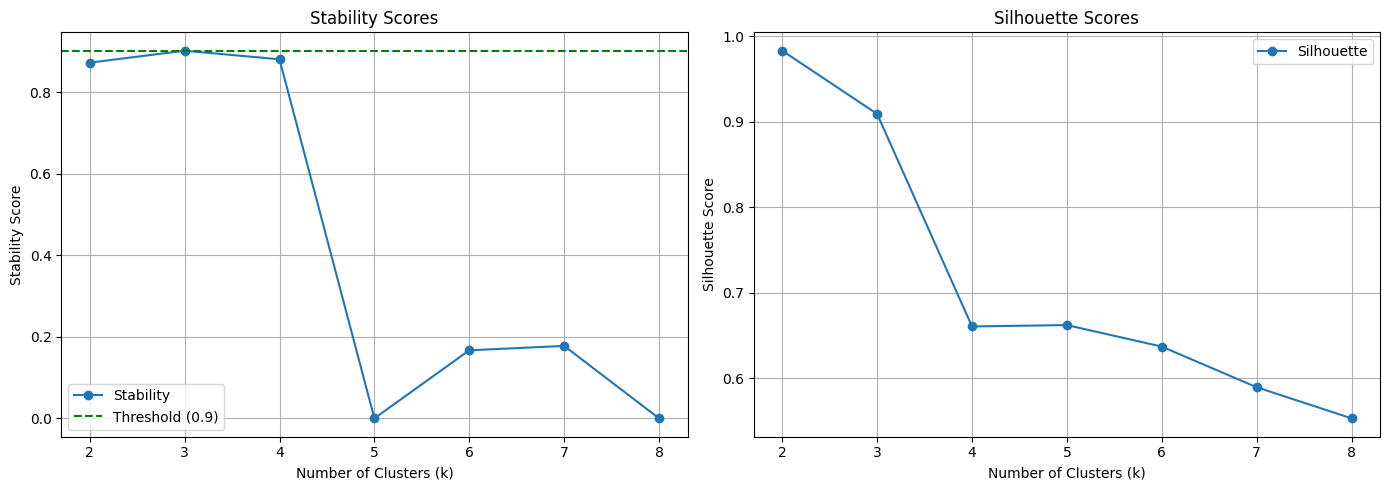

In [23]:
def plot_results(result):
    k_values = list(result['profile'].keys())
    stability_scores = list(result['profile'].values())
    silhouette_scores = list(result['silhouette_scores'].values())

    plt.figure(figsize=(14, 5))

    # Stability plot
    plt.subplot(1, 2, 1)
    plt.plot(k_values, stability_scores, 'o-', label='Stability')
    plt.axhline(y=0.9, color='g', linestyle='--', label='Threshold (0.9)')
    plt.title('Stability Scores')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Stability Score')
    plt.legend()
    plt.grid(True)

    # Silhouette plot
    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'o-', label='Silhouette')
    plt.title('Silhouette Scores')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('Hyperparameter Plots/SilhouetteAndStability.png', bbox_inches='tight', dpi=300)
    plt.show()

plot_results(k_select_results)


### Running the final selected UMAP and KMeans fit.

In [24]:
fit_data, fit_model = umap_embed(X_train_encoded, 
                                    n_components=2, 
                                    n_neighbors = 1500)


In [25]:
fit_data.dtypes

0    float32
1    float32
dtype: object

In [26]:
# Save the model
with open('Models/umap_model.pkl', 'wb') as file:
    pickle.dump(fit_model, file)
    

In [27]:
# Load the model
with open('Models/umap_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [28]:
loaded_model

UMAP(angular_rp_forest=True, metric='jaccard', min_dist=0.0, n_jobs=1, n_neighbors=1500, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

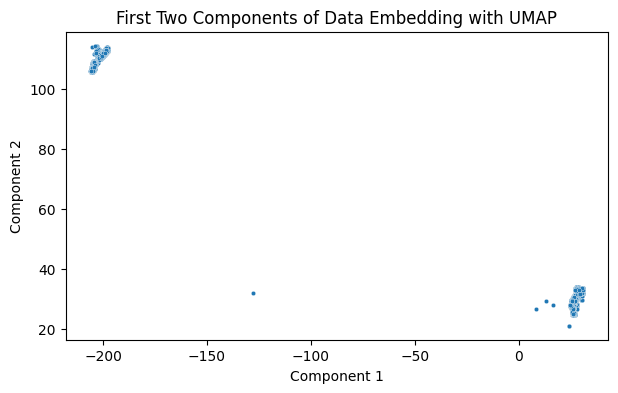

In [29]:
# Now, plotting the first two components
plt.figure(figsize=(7, 4))
sns.scatterplot(x=fit_data.iloc[:, 0], y=fit_data.iloc[:, 1], s=10)
plt.title('First Two Components of Data Embedding with UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(False)
plt.savefig('UMAP Plots/ScatterPlotUMAPEmbeddingsNotClustered.png', bbox_inches='tight')
plt.show()


In [30]:
X_transformed = fit_data
X_transformed.shape

(9307, 2)

In [31]:
## Fit the kmeans with 3 clusters
kmeans = KMeans(n_clusters = 3, n_init=10, init = "k-means++", random_state = 42)
kmeans.fit(X_transformed)

# Cluster centorid, iterations, and cost
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)
print(kmeans.inertia_)
print(np.unique(kmeans.labels_))

[[  27.825024   30.83553 ]
 [-204.67604   107.60123 ]
 [-198.65527   112.69385 ]]
2
74757.90625
[0 1 2]


In [32]:
# Add the cluster labels to the dataframe
df_train['Cluster Labels'] = kmeans.labels_

cluster_sizes = df_train[df_train['Cluster Labels'] != -1]['Cluster Labels'].value_counts().sort_values(ascending=False)
cluster_names = ['First', 
                 'Second', 
                 'Third', 
                ]
cluster_mapping = {label: name for label, name in zip(cluster_sizes.index, cluster_names)}
if -1 in df_train['Cluster Labels'].values:
    cluster_mapping[-1] = 'Not Clustered'
    cluster_names = ['Not Clustered'] + cluster_names

df_train['Segment'] = df_train['Cluster Labels'].map(cluster_mapping)
df_train['Segment'] = df_train['Segment'].astype('category')
df_train['Segment'] = df_train['Segment'].cat.reorder_categories(cluster_names)
cluster_counts = df_train['Segment'].value_counts()
cluster_counts

Segment
First     5944
Second    1708
Third     1655
Name: count, dtype: int64

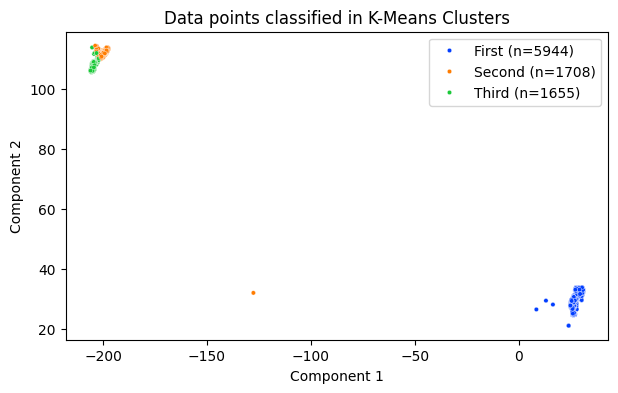

In [33]:
# Plotting the clusters with labels
plt.figure(figsize=(7, 4))
custom_palette = {'First': 'blue', 'Second': 'orange', 'Third': 'green', 'Fourth': 'brown', 'Fifth': 'red'}
scatter = sns.scatterplot(x=X_transformed[0], y=X_transformed[1], hue=df_train['Segment'], palette='bright', s=10)
plt.xlabel('Component 1')  
plt.ylabel('Component 2') 
plt.title('Data points classified in K-Means Clusters')
handles, labels = scatter.get_legend_handles_labels()
new_labels = [f'{label} (n={cluster_counts[label]})' for label in labels]
plt.legend(handles, new_labels)
plt.savefig('UMAP Plots/ScatterPlotUMAPEmbeddingsClustered.png', bbox_inches='tight')
plt.show() 


#### Adjusted rand index between kmeans and hierarchical clustering

In [34]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

HC = AgglomerativeClustering(n_clusters=3, 
                            metric='euclidean', 
                            linkage='ward',
                            distance_threshold=None)
HC.fit_predict(X_transformed)

ari = adjusted_rand_score(kmeans.labels_, HC.labels_)
print("Adjusted Rand Index:", ari)

Adjusted Rand Index: 0.9932360759506796


### Cluster profiling and interpretation

In [35]:
df_new1 = df_train.copy()
df_new = df_new1[['MetNeedFamilyPlanning','PreceedingBirthInterval(33+)', 'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)',
                  'IronPillsDuringPregnancy','HealthFacilityDelivery', 'SkilledDeliveryCareProvider', 
                  'BabyPostnatalCheck', 'MaternalPostpartumHealthCheck', 'WasBreastfed',
                  'ProtectedDrinkingWaterSource', 'ImprovedToiletFacility', 'CleanCookingFuel',
                  'NonTobaccoSmoker', 'DecisionMaking_Participation', 'OfAgeMarriage', 'country',
                  'Segment', 'Cluster Labels']]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   MetNeedFamilyPlanning          9307 non-null   object  
 1   PreceedingBirthInterval(33+)   9307 non-null   object  
 2   AntenatalCare(4+)              9307 non-null   object  
 3   NeonatalTetanusProtection(2+)  9307 non-null   object  
 4   IronPillsDuringPregnancy       9307 non-null   object  
 5   HealthFacilityDelivery         9307 non-null   object  
 6   SkilledDeliveryCareProvider    9307 non-null   object  
 7   BabyPostnatalCheck             9307 non-null   object  
 8   MaternalPostpartumHealthCheck  9307 non-null   object  
 9   WasBreastfed                   9307 non-null   object  
 10  ProtectedDrinkingWaterSource   9307 non-null   object  
 11  ImprovedToiletFacility         9307 non-null   object  
 12  CleanCookingFuel               930

In [36]:
# Which of the original RMNCH indicators have significant differences between groups
categorical = df_new.select_dtypes(include='object')

features_to_plot = []
features_to_drop = []

def create_contingency_table(df, feature):
    contingency_table = pd.crosstab(df[feature], df['Segment'])
    return contingency_table

for feature in df_new.columns:
    if feature not in ['Segment', 'Cluster Labels', 'country']:
        if feature in categorical.columns:
            # Categorical feature, perform Chi-square test
            contingency_table = create_contingency_table(df_new, feature)
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        else:
            # Numeric feature, perform Krusals test since we dont meet homogeneity and normalty test for ANOVA test
            segments = df_new['Segment'].unique()
            groups = [df_new[df_new['Segment'] == segment][feature] for segment in segments]
            stat, p_value = kruskal(*groups)
        
        print(f"{feature}: p-value = {p_value}")        
        if p_value < 0.05/16:
            features_to_plot.append(feature)
        else:
            features_to_drop.append(feature)
print(len(features_to_plot))
print("Features to plot:", features_to_plot)
print("Features to drop:", features_to_drop)

df_new = df_new.drop(features_to_drop, axis=1)


MetNeedFamilyPlanning: p-value = 1.0687995056284544e-72
PreceedingBirthInterval(33+): p-value = 1.4391564276979743e-63
AntenatalCare(4+): p-value = 0.0
NeonatalTetanusProtection(2+): p-value = 0.0
IronPillsDuringPregnancy: p-value = 0.0
HealthFacilityDelivery: p-value = 0.0
SkilledDeliveryCareProvider: p-value = 0.0
BabyPostnatalCheck: p-value = 3.350401882419679e-95
MaternalPostpartumHealthCheck: p-value = 3.906789172082112e-110
WasBreastfed: p-value = 2.8927231528555485e-28
ProtectedDrinkingWaterSource: p-value = 8.797702875397974e-122
ImprovedToiletFacility: p-value = 1.1880653035739823e-144
CleanCookingFuel: p-value = 1.4859550770448885e-54
NonTobaccoSmoker: p-value = 0.2258383026293762
DecisionMaking_Participation: p-value = 1.4110687772945679e-19
OfAgeMarriage: p-value = 3.3991435318923365e-47
15
Features to plot: ['MetNeedFamilyPlanning', 'PreceedingBirthInterval(33+)', 'AntenatalCare(4+)', 'NeonatalTetanusProtection(2+)', 'IronPillsDuringPregnancy', 'HealthFacilityDelivery', 'S

In [37]:
# Obtaining feature proportions across clusters
for column in df_new.columns[:-3]:
    count_values = df_new.groupby('Segment')[column].value_counts().unstack(fill_value=0)
    percentage_values = df_new.groupby('Segment')[column].value_counts(normalize=True).unstack(fill_value=0) * 100
    percentage_values = percentage_values.round(1)

    print(f"Counts for {column} by Segment:")
    print(count_values)
    print("\n")  
    print(f"Percentages for {column} by Segment:")
    print(percentage_values)
    print("\n")


Counts for MetNeedFamilyPlanning by Segment:
MetNeedFamilyPlanning     0     1     2
Segment                                
First                  1207  1417  3320
Second                  401    69  1238
Third                   372   299   984


Percentages for MetNeedFamilyPlanning by Segment:
MetNeedFamilyPlanning     0     1     2
Segment                                
First                  20.3  23.8  55.9
Second                 23.5   4.0  72.5
Third                  22.5  18.1  59.5


Counts for PreceedingBirthInterval(33+) by Segment:
PreceedingBirthInterval(33+)     0     1     2
Segment                                       
First                         2012  2437  1495
Second                         941   479   288
Third                          765   619   271


Percentages for PreceedingBirthInterval(33+) by Segment:
PreceedingBirthInterval(33+)     0     1     2
Segment                                       
First                         33.8  41.0  25.2
Second        

/var/folders/j5/prw5qnh57ddff037srwvnqp40000gq/T/ipykernel_77825/1902621118.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_values = df_new.groupby('Segment')[column].value_counts().unstack(fill_value=0)
/var/folders/j5/prw5qnh57ddff037srwvnqp40000gq/T/ipykernel_77825/1902621118.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_values = df_new.groupby('Segment')[column].value_counts(normalize=True).unstack(fill_value=0) * 100
/var/folders/j5/prw5qnh57ddff037srwvnqp40000gq/T/ipykernel_77825/1902621118.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to

### Radar Plot and Line Plots

In [38]:
### center and scale categorical features
categorical_columns = (df_new.select_dtypes(include=['object']).drop('country', axis=1)).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_dummies = pd.DataFrame(encoder.fit_transform(df_new[categorical_columns]), columns = encoder.get_feature_names_out(categorical_columns))
df_dummies_scaled = pd.DataFrame(StandardScaler().fit_transform(df_dummies), columns=df_dummies.columns)

### concatenate all the processed data
df_new = df_new.drop(categorical_columns, axis=1)
df_new = pd.concat([df_new, df_dummies_scaled], axis=1)

### get the means of features across all segments
df_new_columns = [col for col in df_new.columns if col not in ['Segment', 'country']]
aggregation_dict = {**{col: 'mean' for col in df_new_columns}}
aggregation_dict['Cluster Labels'] = 'count'
segment_summary = df_new.groupby('Segment', observed=True).agg(aggregation_dict)
segment_summary = segment_summary.drop(['MetNeedFamilyPlanning_2', 'PreceedingBirthInterval(33+)_2'], axis=1)
segment_summary

,Cluster Labels,MetNeedFamilyPlanning_1,PreceedingBirthInterval(33+)_1,AntenatalCare(4+)_1,NeonatalTetanusProtection(2+)_1,IronPillsDuringPregnancy_1,HealthFacilityDelivery_1,SkilledDeliveryCareProvider_1,BabyPostnatalCheck_1,MaternalPostpartumHealthCheck_1,WasBreastfed_1,ProtectedDrinkingWaterSource_1,ImprovedToiletFacility_1,CleanCookingFuel_1,DecisionMaking_Participation_1,OfAgeMarriage_1
Segment,,,,,,,,,,,,,,,,
First,5944,0.118363,0.062166,0.259406,0.176490,0.277176,0.699554,0.678385,0.028319,-0.002502,-0.087802,0.177772,0.189727,0.120656,0.054456,0.109874
Second,1708,-0.384530,-0.204756,-0.997613,-0.876499,-1.245553,-1.242282,-1.200430,-0.398700,-0.376552,0.156512,-0.418317,-0.478026,-0.262489,-0.200925,-0.260829
Third,1655,-0.028261,-0.011958,0.097894,0.270699,0.289953,-1.230412,-1.197576,0.309760,0.397595,0.153819,-0.206762,-0.188079,-0.162445,0.011778,-0.125435


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


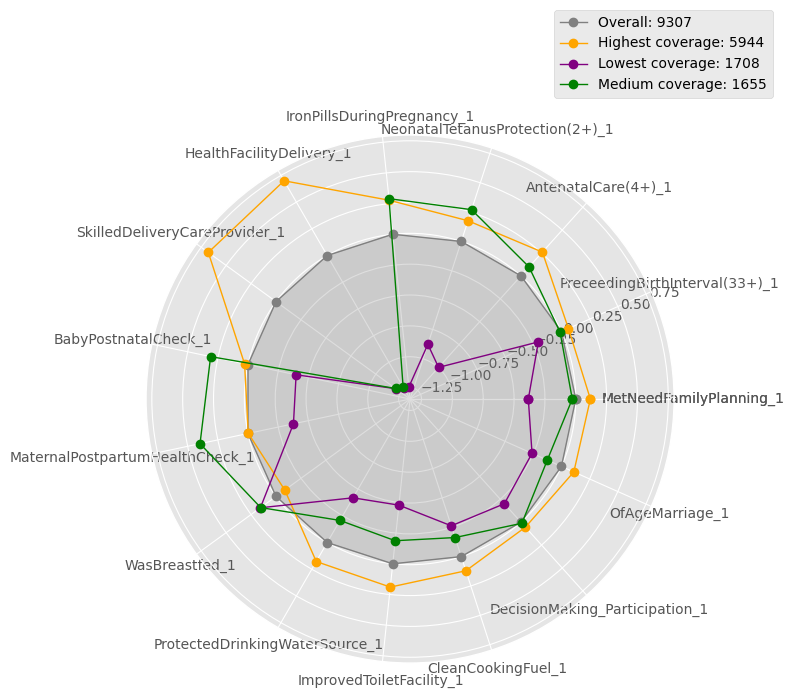

In [39]:
plt.style.use('ggplot')

## data for visualization
subjects = (segment_summary.drop(columns = "Cluster Labels", axis = 1).columns).to_list()
overall = np.zeros(len(subjects)).tolist()
First = (segment_summary.loc['First', subjects]).to_list()
Second = (segment_summary.loc['Second', subjects]).to_list()
Third = (segment_summary.loc['Third', subjects]).to_list()

## Obtain angles
angles=np.linspace(0,2*np.pi,len(subjects), endpoint=False)

## completing the full circle
angles=np.concatenate((angles,[angles[0]]))
subjects.append(subjects[0])
overall.append(overall[0])
First.append(First[0])
Second.append(Second[0])
Third.append(Third[0])

## Plotting
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, polar=True)

#Overall Plot
ax.plot(angles, overall, 'o-', color='grey', linewidth=1, label='Overall: 9307')
ax.fill(angles, overall, alpha=0.25, color='grey')

#First Plot
ax.plot(angles, First, 'o-', color='orange', linewidth=1, label=f"{'Highest coverage'}: {segment_summary.loc['First','Cluster Labels']}")

# Second Plot
ax.plot(angles, Second, 'o-', color='purple', linewidth=1, label=f"{'Lowest coverage'}: {segment_summary.loc['Second','Cluster Labels']}")

# Third Plot
ax.plot(angles, Third, 'o-', color='green', linewidth=1, label=f"{'Medium coverage'}: {segment_summary.loc['Third','Cluster Labels']}")

ax.set_thetagrids(angles * 180/np.pi, subjects)
plt.grid(True)
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.25))
plt.savefig('Radar Plots/Three_Clusters_UMAP_KMeans.eps', bbox_inches='tight', dpi=300)
plt.show()


### Save dataset for multinomial regression

In [44]:
df_new1 = df_train.copy()
df_Dem_SES = df_new1[['MothersCurrentAge', 'MaritalStatus', 'MaternalParity', 'ChildGender_Male', 
                      'AgeOfChildAtDeath', 'UrbanResidence', 'WealthIndex', 'MothersEducationalLevel', 'MothersEmploymentStatus',
                  'country', 'Segment', 'Cluster Labels']]
df_Dem_SES.to_csv('/Users/clairenajjuuko/Library/CloudStorage/Box-Box/Under_Five_Mortality/df_Dem_SES.csv', index=False)
df_Dem_SES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9307 entries, 0 to 9306
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   MothersCurrentAge        9307 non-null   float64 
 1   MaritalStatus            9307 non-null   object  
 2   MaternalParity           9307 non-null   float64 
 3   ChildGender_Male         9307 non-null   object  
 4   AgeOfChildAtDeath        9307 non-null   float64 
 5   UrbanResidence           9307 non-null   object  
 6   WealthIndex              9307 non-null   object  
 7   MothersEducationalLevel  9307 non-null   object  
 8   MothersEmploymentStatus  9307 non-null   object  
 9   country                  9307 non-null   object  
 10  Segment                  9307 non-null   category
 11  Cluster Labels           9307 non-null   int32   
dtypes: category(1), float64(3), int32(1), object(7)
memory usage: 772.8+ KB


### Country Level Aggregation

In [45]:
segment_counts = df_new.groupby(['country', 'Segment'], observed=False).size().unstack(fill_value=0)
segment_proportions = segment_counts.div(segment_counts.sum(axis=1), axis=0)
segment_proportions = segment_proportions.mul(100)

country_segment_proportions = pd.concat([segment_counts.add_suffix('_Count'), segment_proportions.add_suffix('_Prop')], axis=1)

country_segment_proportions = country_segment_proportions.reset_index()

country_U5MR_df = pd.read_csv('df_country_U5MR.csv')

country_data = pd.concat([country_segment_proportions, country_U5MR_df], axis=1)

In [46]:
country_data.columns

Index(['country', 'First_Count', 'Second_Count', 'Third_Count', 'First_Prop',
       'Second_Prop', 'Third_Prop', 'Country code', 'Country',
       'Year of survey', 'Number of births included in analysis',
       'Under-five Mortality Rate ', 'Lower bound', 'Upper bound'],
      dtype='object')

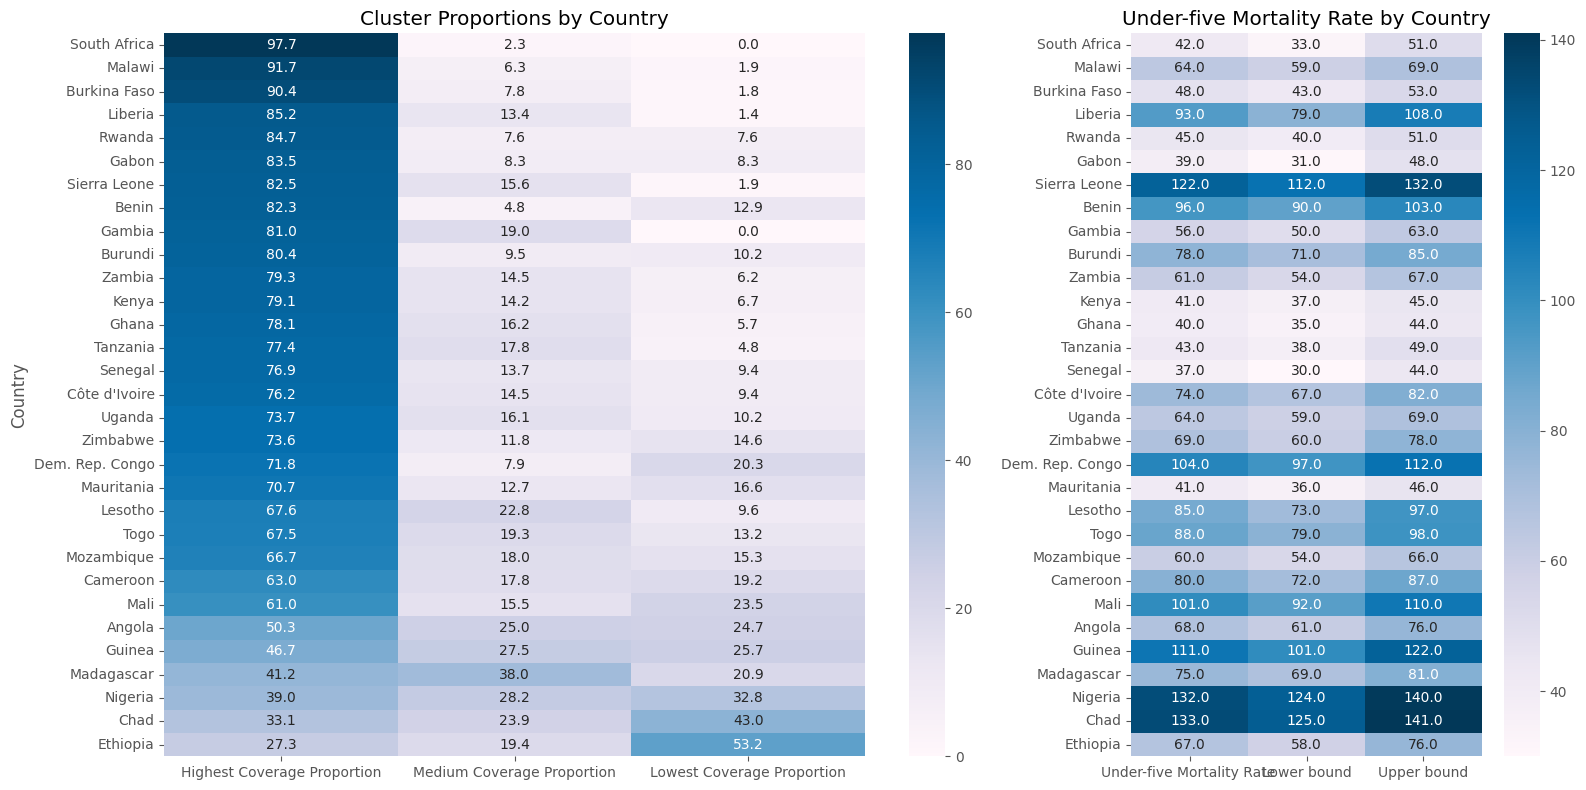

In [47]:
import matplotlib.gridspec as gridspec
df_sorted = country_data.sort_values(['First_Prop', 'Third_Prop', 'Second_Prop'], ascending=False)

df_sorted.set_index('Country', inplace=True)

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
custom_labels = ['Highest Coverage Proportion', 'Medium Coverage Proportion', 'Lowest Coverage Proportion']
sns.heatmap(df_sorted[['First_Prop', 'Third_Prop', 'Second_Prop']], annot=True, cmap="PuBu", fmt=".1f", ax=ax1, xticklabels=custom_labels)
ax1.set_title('Cluster Proportions by Country')
ax1.set_ylabel('Country')
plt.xticks(rotation=0)  
plt.yticks(rotation=0)  

ax2 = plt.subplot(gs[1])
sns.heatmap(df_sorted[['Under-five Mortality Rate ', 'Lower bound', 'Upper bound']], annot=True, cmap="PuBu", fmt=".1f", ax=ax2)
ax2.set_title('Under-five Mortality Rate by Country')
ax2.set_ylabel('') 
plt.xticks(rotation=0)  
plt.yticks(rotation=0)  

plt.tight_layout()
plt.show()


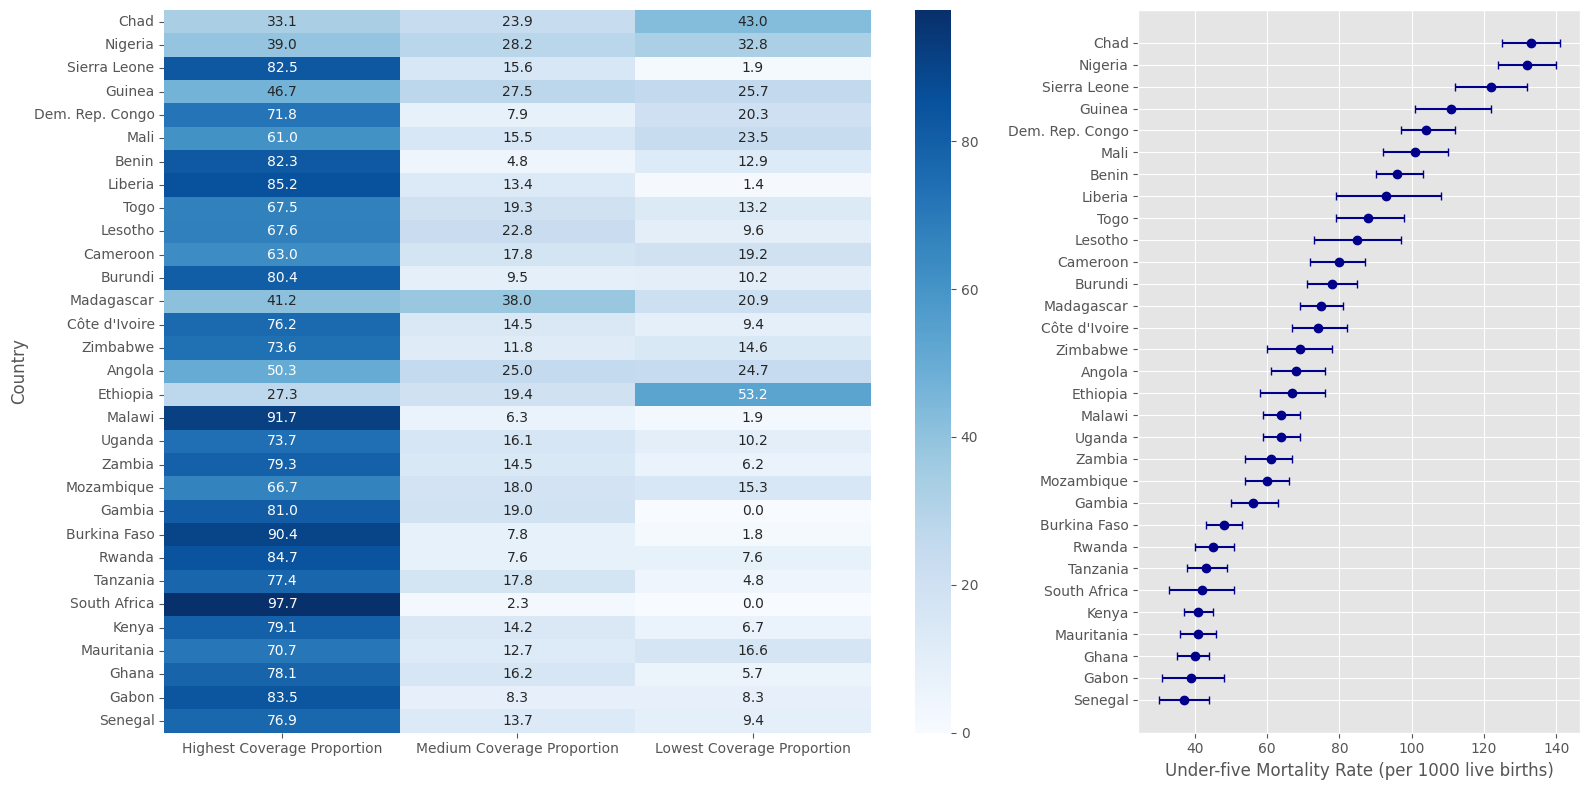

In [48]:

df_sorted = country_data.sort_values(['Under-five Mortality Rate ', 'First_Prop', 'Third_Prop', 'Second_Prop'], ascending=False)
df_sorted.set_index('Country', inplace=True)

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
custom_labels = ['Highest Coverage Proportion', 'Medium Coverage Proportion', 'Lowest Coverage Proportion']
sns.heatmap(df_sorted[['First_Prop', 'Third_Prop', 'Second_Prop']], annot=True, cmap='Blues', fmt=".1f", ax=ax1, xticklabels=custom_labels)
ax1.set_ylabel('Country')
plt.xticks(rotation=0)  
plt.yticks(rotation=0)   

ax2 = plt.subplot(gs[1])
lower_errors = df_sorted['Under-five Mortality Rate '] - df_sorted['Lower bound']
upper_errors = df_sorted['Upper bound'] - df_sorted['Under-five Mortality Rate ']
asymmetric_error = [lower_errors.values, upper_errors.values]

countries = df_sorted.index
mortality_rates = df_sorted['Under-five Mortality Rate '].values
ax2.errorbar(mortality_rates, countries, xerr=asymmetric_error, fmt='o', color='darkblue', capsize=3)
ax2.set_xlabel('Under-five Mortality Rate (per 1000 live births)')
ax2.invert_yaxis()

plt.tight_layout()
plt.savefig('Country Plots/ClusterProportionsU5MR.eps', bbox_inches='tight', dpi=300)
plt.show()
